In [0]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import torchvision.transforms
import torchvision
import numpy as np
import torch.optim as optim
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
class CIFAR10_structured(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,16,3),nn.Tanh(),nn.AvgPool2d(3,3),
            nn.Conv2d(16,64,3),nn.Tanh(),nn.AvgPool2d(2,2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(1024,64),nn.Tanh(),
            nn.Linear(64,32),nn.Tanh(),
            nn.Linear(32,10),nn.Softmax()
        )
        
    def forward(self,x):
        x = self.cnn_model(x)
        x = x.view(x.size(0),-1)
        return self.fc_model(x)

In [0]:
def evaluation(dataloader):
    # print("Hii")
    total,correct = 0,0
    for data in dataloader:
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        outputs = net(inputs).to(device)
        _,pred_classes = torch.max(outputs.data,1)
        total += labels.size(0)
#         print(pred_classes.shape,labels.shape)
        correct += (pred_classes == labels).sum().item()
        return 100 * correct/total

In [0]:
net = CIFAR10_structured().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [38]:
batch_size = 256
trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=True, transform=torchvision.transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=True, transform=torchvision.transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified



epoch: 0/128, Test_acc: 52.343750 , train_acc: 73.437500



epoch: 1/128, Test_acc: 49.609375 , train_acc: 75.390625



epoch: 2/128, Test_acc: 49.218750 , train_acc: 73.437500



epoch: 3/128, Test_acc: 51.171875 , train_acc: 73.437500



epoch: 4/128, Test_acc: 49.609375 , train_acc: 76.953125



epoch: 5/128, Test_acc: 50.000000 , train_acc: 74.218750



epoch: 6/128, Test_acc: 51.953125 , train_acc: 72.656250



epoch: 7/128, Test_acc: 51.953125 , train_acc: 78.515625



epoch: 8/128, Test_acc: 50.390625 , train_acc: 72.656250



epoch: 9/128, Test_acc: 48.437500 , train_acc: 75.000000



epoch: 10/128, Test_acc: 49.609375 , train_acc: 76.562500



epoch: 11/128, Test_acc: 50.000000 , train_acc: 73.437500



epoch: 12/128, Test_acc: 51.953125 , train_acc: 78.125000



epoch: 13/128, Test_acc: 49.609375 , train_acc: 78.515625



epoch: 14/128, Test_acc: 48.437500 , train_acc: 75.390625



epoch: 15/128, Test_acc: 49.218750 , train_acc: 74.218750



epoch: 16/128, Test_acc: 51.171875 , train_acc: 75.000000



epoch: 17/128, Test_acc: 51.171875 , train_acc: 74.218750



epoch: 18/128, Test_acc: 50.781250 , train_acc: 78.125000



epoch: 19/128, Test_acc: 51.171875 , train_acc: 78.906250



epoch: 20/128, Test_acc: 51.171875 , train_acc: 77.734375



epoch: 21/128, Test_acc: 49.609375 , train_acc: 72.656250



epoch: 22/128, Test_acc: 49.609375 , train_acc: 80.859375



epoch: 23/128, Test_acc: 51.562500 , train_acc: 76.953125



epoch: 24/128, Test_acc: 50.390625 , train_acc: 72.265625



epoch: 25/128, Test_acc: 50.781250 , train_acc: 72.265625



epoch: 26/128, Test_acc: 53.125000 , train_acc: 80.859375



epoch: 27/128, Test_acc: 51.171875 , train_acc: 78.125000



epoch: 28/128, Test_acc: 48.046875 , train_acc: 78.515625



epoch: 29/128, Test_acc: 49.218750 , train_acc: 74.609375



epoch: 30/128, Test_acc: 50.781250 , train_acc: 76.171875



epoch: 31/128, Test_acc: 51.171875 , train_acc: 72.265625



epoch: 32/128, Test_acc: 49.218750 , train_acc: 73.828125



epoch: 33/128, Test_acc: 51.953125 , train_acc: 76.562500



epoch: 34/128, Test_acc: 47.265625 , train_acc: 76.953125



epoch: 35/128, Test_acc: 48.046875 , train_acc: 78.906250



epoch: 36/128, Test_acc: 51.171875 , train_acc: 78.125000



epoch: 37/128, Test_acc: 52.343750 , train_acc: 80.468750



epoch: 38/128, Test_acc: 49.609375 , train_acc: 75.390625



epoch: 39/128, Test_acc: 49.609375 , train_acc: 72.656250



epoch: 40/128, Test_acc: 51.171875 , train_acc: 76.953125



epoch: 41/128, Test_acc: 51.562500 , train_acc: 78.125000



epoch: 42/128, Test_acc: 50.390625 , train_acc: 78.515625



epoch: 43/128, Test_acc: 50.390625 , train_acc: 79.296875



epoch: 44/128, Test_acc: 48.828125 , train_acc: 75.781250



epoch: 45/128, Test_acc: 52.343750 , train_acc: 74.609375



epoch: 46/128, Test_acc: 50.781250 , train_acc: 76.171875



epoch: 47/128, Test_acc: 50.390625 , train_acc: 79.296875



epoch: 48/128, Test_acc: 48.828125 , train_acc: 76.953125



epoch: 49/128, Test_acc: 50.781250 , train_acc: 75.781250



epoch: 50/128, Test_acc: 53.125000 , train_acc: 79.687500



epoch: 51/128, Test_acc: 51.562500 , train_acc: 77.734375



epoch: 52/128, Test_acc: 51.171875 , train_acc: 75.390625



epoch: 53/128, Test_acc: 51.562500 , train_acc: 80.078125



epoch: 54/128, Test_acc: 50.781250 , train_acc: 80.859375



epoch: 55/128, Test_acc: 50.390625 , train_acc: 82.031250



epoch: 56/128, Test_acc: 47.656250 , train_acc: 72.265625



epoch: 57/128, Test_acc: 49.218750 , train_acc: 76.562500



epoch: 58/128, Test_acc: 51.562500 , train_acc: 77.734375



epoch: 59/128, Test_acc: 50.390625 , train_acc: 75.781250



epoch: 60/128, Test_acc: 51.171875 , train_acc: 75.781250



epoch: 61/128, Test_acc: 51.953125 , train_acc: 81.250000



epoch: 62/128, Test_acc: 50.390625 , train_acc: 72.656250



epoch: 63/128, Test_acc: 49.609375 , train_acc: 76.171875



epoch: 64/128, Test_acc: 51.171875 , train_acc: 80.859375



epoch: 65/128, Test_acc: 51.171875 , train_acc: 79.296875



epoch: 66/128, Test_acc: 49.609375 , train_acc: 75.781250



epoch: 67/128, Test_acc: 49.609375 , train_acc: 75.000000



epoch: 68/128, Test_acc: 48.437500 , train_acc: 77.343750



epoch: 69/128, Test_acc: 48.437500 , train_acc: 70.312500



epoch: 70/128, Test_acc: 52.343750 , train_acc: 76.562500



epoch: 71/128, Test_acc: 51.171875 , train_acc: 82.031250



epoch: 72/128, Test_acc: 51.171875 , train_acc: 80.859375



epoch: 73/128, Test_acc: 50.000000 , train_acc: 76.562500



epoch: 74/128, Test_acc: 48.437500 , train_acc: 79.687500



epoch: 75/128, Test_acc: 47.656250 , train_acc: 76.562500



epoch: 76/128, Test_acc: 49.609375 , train_acc: 79.296875



epoch: 77/128, Test_acc: 51.953125 , train_acc: 76.953125



epoch: 78/128, Test_acc: 51.953125 , train_acc: 79.687500



epoch: 79/128, Test_acc: 48.437500 , train_acc: 77.343750



epoch: 80/128, Test_acc: 51.171875 , train_acc: 76.171875



epoch: 81/128, Test_acc: 49.609375 , train_acc: 80.468750



epoch: 82/128, Test_acc: 50.781250 , train_acc: 78.515625



epoch: 83/128, Test_acc: 48.046875 , train_acc: 74.609375



epoch: 84/128, Test_acc: 47.265625 , train_acc: 78.125000



epoch: 85/128, Test_acc: 48.437500 , train_acc: 77.734375



epoch: 86/128, Test_acc: 51.562500 , train_acc: 81.250000



epoch: 87/128, Test_acc: 49.218750 , train_acc: 83.984375



epoch: 88/128, Test_acc: 53.125000 , train_acc: 77.734375



epoch: 89/128, Test_acc: 50.781250 , train_acc: 78.906250



epoch: 90/128, Test_acc: 49.609375 , train_acc: 78.906250



epoch: 91/128, Test_acc: 52.343750 , train_acc: 77.734375



epoch: 92/128, Test_acc: 49.609375 , train_acc: 76.562500



epoch: 93/128, Test_acc: 53.125000 , train_acc: 75.781250



epoch: 94/128, Test_acc: 52.343750 , train_acc: 80.078125



epoch: 95/128, Test_acc: 49.609375 , train_acc: 78.125000



epoch: 96/128, Test_acc: 49.218750 , train_acc: 80.078125



epoch: 97/128, Test_acc: 50.000000 , train_acc: 81.640625



epoch: 98/128, Test_acc: 51.171875 , train_acc: 76.562500



epoch: 99/128, Test_acc: 49.218750 , train_acc: 78.515625



epoch: 100/128, Test_acc: 51.953125 , train_acc: 83.593750



epoch: 101/128, Test_acc: 47.656250 , train_acc: 75.390625



epoch: 102/128, Test_acc: 50.390625 , train_acc: 73.046875



epoch: 103/128, Test_acc: 52.734375 , train_acc: 75.781250



epoch: 104/128, Test_acc: 50.000000 , train_acc: 79.687500



epoch: 105/128, Test_acc: 48.046875 , train_acc: 77.734375



epoch: 106/128, Test_acc: 51.562500 , train_acc: 77.343750



epoch: 107/128, Test_acc: 50.781250 , train_acc: 77.343750



epoch: 108/128, Test_acc: 49.218750 , train_acc: 74.218750



epoch: 109/128, Test_acc: 50.000000 , train_acc: 80.078125



epoch: 110/128, Test_acc: 50.000000 , train_acc: 81.640625



epoch: 111/128, Test_acc: 49.218750 , train_acc: 76.562500



epoch: 112/128, Test_acc: 49.218750 , train_acc: 77.734375



epoch: 113/128, Test_acc: 51.953125 , train_acc: 79.687500



epoch: 114/128, Test_acc: 50.781250 , train_acc: 76.953125



epoch: 115/128, Test_acc: 51.171875 , train_acc: 78.906250



epoch: 116/128, Test_acc: 49.609375 , train_acc: 80.859375



epoch: 117/128, Test_acc: 50.781250 , train_acc: 76.171875



epoch: 118/128, Test_acc: 50.390625 , train_acc: 78.125000



epoch: 119/128, Test_acc: 50.000000 , train_acc: 80.859375



epoch: 120/128, Test_acc: 50.000000 , train_acc: 78.515625



epoch: 121/128, Test_acc: 48.046875 , train_acc: 77.343750



epoch: 122/128, Test_acc: 48.828125 , train_acc: 79.296875



epoch: 123/128, Test_acc: 50.781250 , train_acc: 76.953125



epoch: 124/128, Test_acc: 48.828125 , train_acc: 78.125000



epoch: 125/128, Test_acc: 51.562500 , train_acc: 81.250000



epoch: 126/128, Test_acc: 51.171875 , train_acc: 79.687500



epoch: 127/128, Test_acc: 50.390625 , train_acc: 76.562500



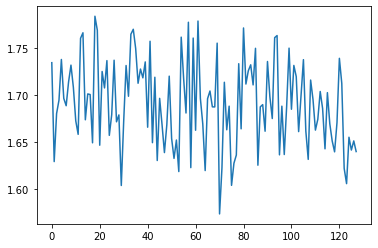

CPU times: user 12min 2s, sys: 42.2 s, total: 12min 44s
Wall time: 12min 48s


In [41]:
%%time
loss_arr =[]
loss_epoch_arr = []
max_epoch = 128

for epoch in tqdm_notebook(range(max_epoch),unit = 'epoch'):
    for i,data in tqdm_notebook(enumerate(trainloader,0),unit='data'):
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print('epoch: %d/%d, Test_acc: %f , train_acc: %f' %(epoch,max_epoch,evaluation(testloader),evaluation(trainloader)))
    
plt.plot(loss_epoch_arr)
plt.show()


In [42]:
print("Test Accuracy",evaluation(testloader))
print("Train Accuracy",evaluation(trainloader))

Test Accuracy 50.390625
Train Accuracy 79.6875
